<a href="https://colab.research.google.com/github/Bapuch/DataViz-Twitter-Gender-Classification/blob/master/Twitter_Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># Twitter Gender Classification


>![twitter_male_female](https://amp.businessinsider.com/images/4e3181b56bb3f7f626000000-320-240.jpg)



### Import libraries

In [0]:
# impor tlibraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

### Import file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gender-classifier.csv to gender-classifier.csv


In [0]:
import io
twitter = pd.read_csv(io.BytesIO(uploaded['gender-classifier.csv']), encoding='latin1')

In [68]:
from IPython.display import Image
uploaded = files.upload()

Saving Krombopulos_Michael.png to Krombopulos_Michael.png


# Quick Data Preview


## Gender distribution
How could we know what are the 5.6% unknown ?

(-1.1129351838576378,
 1.2037618639448497,
 -1.1124570547546884,
 1.1026668405287563)

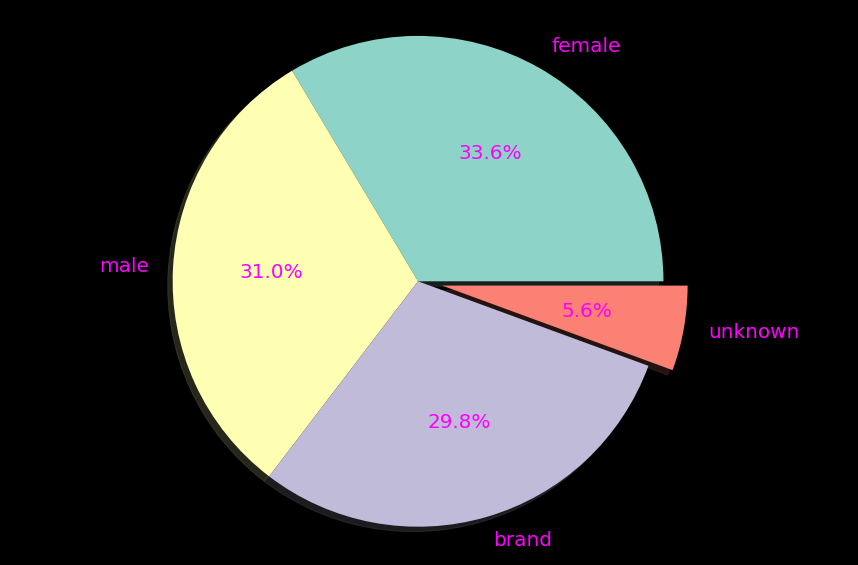

In [5]:
# Distribution Male, Female, Brand, Unknown
plt.style.use('dark_background') #fivethirtyeight dark_background Solarize_Light2

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(twitter.gender.value_counts().values, explode=(0, 0, 0, 0.1), labels=twitter.gender.value_counts().index, autopct='%1.1f%%',
        shadow=True, textprops=dict(color="fuchsia", fontsize= 20))
ax1.axis('equal', aspect=2)  # Equal aspect ratio ensures that pie is drawn as a circle.


#### Fields description 

 
  - `_unit_id`: a unique id for user
  - `_golden`: whether the user was included in the gold standard for the model; TRUE or FALSE
  - `_unit_state`: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)
  - `_trusted_judgments`: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations
  - `_last_judgment_at`: date and time of last contributor judgment; blank for gold standard observations
  - `gender`: one of male, female, or brand (for non-human profiles)
  - `gender:confidence`: a float representing confidence in the provided gender
  - `profile_yn`: "no" here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it
  - `profile_yn:confidence`: confidence in the existence/non-existence of the profile
  - `created`: date and time when the profile was created
  - `description`: the user's profile description
  - `fav_number`: number of tweets the user has favorited
  - `gender_gold`: if the profile is golden, what is the gender?
  - `link_color`: the link color on the profile, as a hex value
  - `name`: the user's name
  - `profile_yn_gold`: whether the profile y/n value is golden
  - `profileimage`: a link to the profile image
  - `retweet_count`: number of times the user has retweeted (or possibly, been retweeted)
  - `sidebar_color`: color of the profile sidebar, as a hex value
  - `text`: text of a random one of the user's tweets
  - `tweet_coord`: if the user has location turned on, the coordinates as a string with the format "[latitude, longitude]"
  - `tweet_count`: number of tweets that the user has posted
  - `tweet_created`: when the random tweet (in the text column) was created
  - `tweet_id`: the tweet id of the random tweet
  - `tweet_location`: location of the tweet; seems to not be particularly normalized
  - `user_timezone`: the timezone of the user

## Check Fields Relevance


### Gold status & Cie

In [6]:
twitter.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [7]:
print('total rows and colums:',twitter.shape)

total rows and colums: (20050, 26)


In [8]:
## Checking Gold status
print('gold status:')
twitter._golden.value_counts()

gold status:


False    20000
True        50
Name: _golden, dtype: int64

In [9]:
# Checking unit_state
print('_unit_state')
twitter._golden.value_counts()

_unit_state


False    20000
True        50
Name: _golden, dtype: int64

In [10]:
# Checkign the trusted_judgement column
print('Number of trusted_judgement different from 3:')
twitter[twitter._trusted_judgments != 3].index.size

Number of trusted_judgement different from 3:


50

In [11]:
# confidence in the existence of the profile
print('Profile existence confidence: total number of trusted + mean of confidence')
twitter.groupby('profile_yn')['profile_yn:confidence'].aggregate(['count', np.mean])

Profile existence confidence: total number of trusted + mean of confidence


,count,mean
profile_yn,,
no,97,0.756139
yes,19953,0.994374


In [12]:
# Check the differences between gender and gender_gold:
print('Differences between gender and gender_gold:')
print(f"\tOnly {twitter[(twitter.gender != twitter.gender_gold) & (twitter.gender_gold.notna())].index.size} differences:\n")
twitter[(twitter.gender != twitter.gender_gold) & (twitter.gender_gold.notna())][['_golden', 'gender', 'gender_gold', 'gender:confidence']]

Differences between gender and gender_gold:
	Only 5 differences:



,_golden,gender,gender_gold,gender:confidence
20005,True,male,brand,0.7538
20016,True,female,female\nunknown,0.7650
20023,True,male,male\nunknown,0.5762
20024,True,brand,unknown,0.5540
20042,True,brand,unknown,0.6364


### Relevance of `retweet_count` Field

In [13]:
twitter.pivot_table('_unit_id', 'retweet_count', 'gender', aggfunc='count')

gender,brand,female,male,unknown
retweet_count,,,,
0,5746.0,6527.0,5970.0,1093.0
1,149.0,143.0,184.0,22.0
2,19.0,17.0,18.0,2.0
3,9.0,3.0,5.0,NaN
4,4.0,1.0,1.0,NaN
5,4.0,2.0,1.0,NaN
6,NaN,1.0,7.0,NaN
7,3.0,1.0,1.0,NaN
8,1.0,1.0,1.0,NaN


In [14]:
# Number tweets retweeted
print(f"{twitter[twitter.retweet_count > 0].retweet_count.size} tweets were actually retweeted, which means {twitter[twitter.retweet_count > 0].retweet_count.size * 100 / 20050:.2f}% only")

619 tweets were actually retweeted, which means 3.09% only


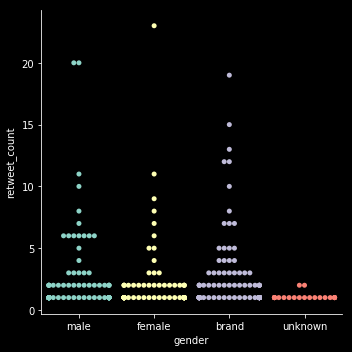

In [15]:
# Distribution of retweet count above 1 and below 25 (excluding super outliers)
sns.catplot(x="gender", y="retweet_count", kind="swarm", data=twitter[(twitter.retweet_count > 0) & (twitter.retweet_count < 25)])

###  Relevance of  `tweet_created`  field

In [16]:
twitter.tweet_created.value_counts().to_frame()

,tweet_created
10/26/15 12:40,8076
10/26/15 13:19,5892
10/26/15 13:20,3865
10/26/15 12:39,1952
10/26/15 13:18,265


### Timezones
- 157 different timezones
- 10 first Timezones totalise 78.90% of the sample.
- Essentially english speaking people

In [17]:
t=twitter.user_timezone.value_counts() * 100/ twitter.user_timezone.value_counts().sum()
print(f'{twitter.user_timezone.unique().size} different timezones')
print(f'10 first Timezones totalise {t.head(10).sum() * 100:.2f}% of the sample.\nEssentially english speaking people:\n')
t=t.to_frame('% of total timezones')
t.head(10)


157 different timezones
10 first Timezones totalise 7890.96% of the sample.
Essentially english speaking people:



,% of total timezones
Eastern Time (US & Canada),20.372184
Pacific Time (US & Canada),17.189030
Central Time (US & Canada),12.283709
London,10.667646
Atlantic Time (Canada),4.807378
Quito,3.991185
Amsterdam,3.142344
Arizona,2.497551
Mountain Time (US & Canada),2.456742
Casablanca,1.501796


## Conclusion:
We will ignore the following columns as only **50 out of 20 050** twitos have a golden status
- `_golden`, `_unit_state`,
- `_trusted_judgments`
- `_last_judgment_at`
- `profile_yn`
- `profile_yn:confidence`
- `gender_gold`

And also these columns:
- `tweet_created`: Data were collected on October 26th 2015 at 12.40pm and 1.20 pm
- `retweet_count`: since data were retrieving on a 1-hour snapshot, most tweets weren't retweeted
- `timezone`: Data mostly comes from eglish speaking countries




# Account creation hour Vs Number of Tweets Vs Number of Favorite Tweets

### Create the `h_created` field: hour of account creation

In [0]:
import datetime
h_created = twitter.created.apply(lambda x: pd.to_datetime(x).hour if pd.to_datetime(x).minute < 30 else (pd.to_datetime(x).hour + 1) % 24)

In [0]:
twitter['h_created'] = h_created

### Viz

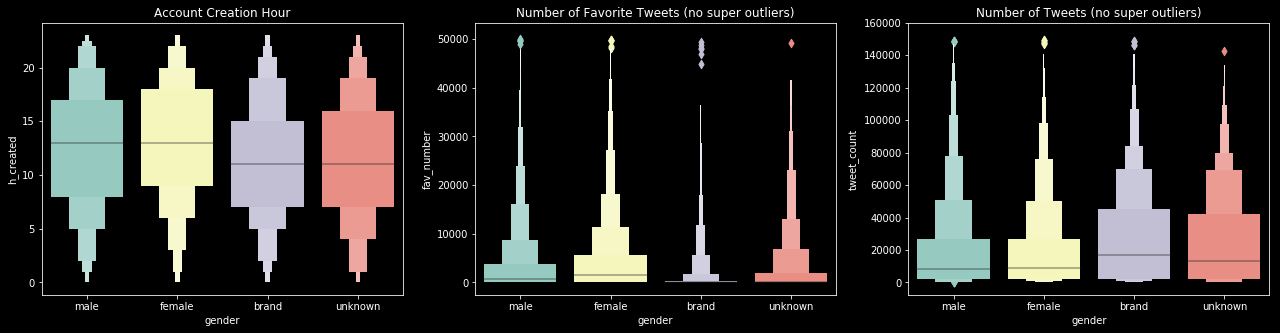

In [20]:
f, axes = plt.subplots(1, 3, figsize=(22,5))
#f.suptitle('Distributions of Iris Features')
p1= sns.catplot(x='gender', y='h_created', data=twitter, kind='boxen', ax=axes[0])
axes[0].set(title='Account Creation Hour')
p2=sns.catplot(x='gender', y='fav_number', data=twitter[twitter.fav_number < 50000], kind='boxen', ax=axes[1])
axes[1].set(title="Number of Favorite Tweets (no super outliers)")
p3 = sns.catplot(x='gender', y='tweet_count', data=twitter[twitter.tweet_count < 150000], kind='boxen', ax=axes[2])
axes[2].set(title='Number of Tweets (no super outliers)')

plt.close(p1.fig)
plt.close(p2.fig)
plt.close(p3.fig)

> the `unknown` type shares soem caracteristics with the `brand` type

### Checking Correlation Between `tweet_count`, `fav_number` & `h_created`

#### Preparing Data

In [0]:
mini_twitter = twitter[twitter.gender != 'unknown'][['gender', 'h_created', 'fav_number', 'tweet_count']]

In [22]:
### Getting rid of outliers for each columns
print('Shape with outliers:', mini_twitter.shape)
for c in mini_twitter.drop('gender',axis=1).columns:
    # get first and third quartiles for quitters and survivors
    q1, q3 = np.percentile(twitter[c].values , [25,75])
    # Interquartile range
    iqr = q3 - q1
    #low and upper bound
    lb = q1 -(1.5 * iqr) 
    ub = q3 +(1.5 * iqr)
    # removing rows
    mini_twitter = mini_twitter.drop(mini_twitter[(mini_twitter[c] > ub) | (mini_twitter[c] < lb)].index)

print('Shape without outliers:', mini_twitter.shape)

Shape with outliers: (18933, 4)
Shape without outliers: (15180, 4)


#### Viz

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


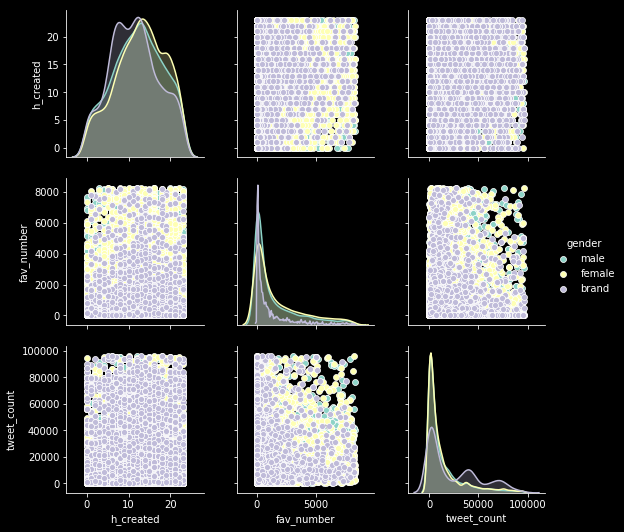

In [23]:
sns.pairplot(mini_twitter, hue='gender', size=2.5)

No correlation between these!!

# Profile Colors Customization

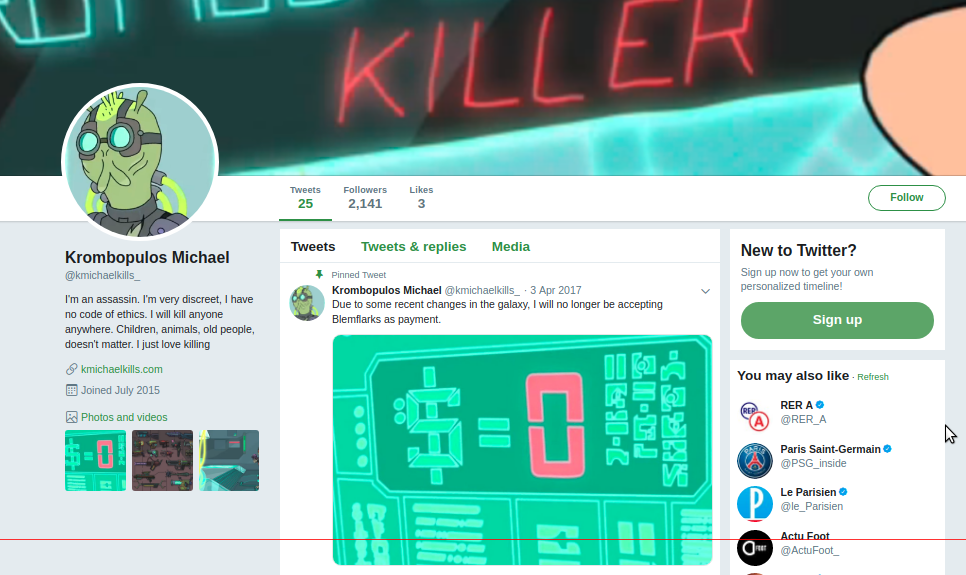

In [69]:
Image("Krombopulos_Michael.png", width=1000)

In [25]:
# how many different link_colors
print(f"{twitter.link_color.unique().size} different link colors")

# how many different sidebar_colors
print(f"{twitter.sidebar_color.unique().size} different sidebar colors")
      

3001 different link colors
561 different sidebar colors


#### import Webcolors and create get_colour_name  approximation function

In [26]:
pip install webcolors

In [0]:
# import library to convert hexadecimal to color name
import webcolors

# Function tat will find the closest color name
def get_colour_name(hexa):
    min_colours = {}
    rgb_triplet = webcolors.hex_to_rgb('#'+hexa)
    for key, name in webcolors.css21_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

### Add link/sidebar color name columns

In [0]:
# sidebar color name
twitter['sidebar_color_name'] = twitter.sidebar_color.apply(
    lambda x: get_colour_name(x) if len(x) == 6 else 'black' if len(x) == 1 else 'NaN')

# linkbar colorname
## change 0 to 000000 and 99999 to 999999
twitter.link_color = twitter.link_color.apply(
    lambda x: '000000' if x == '0' else '999999' if x == '9999' else x)

## create link color name
twitter['link_color_name'] = twitter.link_color.apply(
    lambda x: get_colour_name(x) if len(x) == 6 else  'NaN')

### Add link/sidebar color status columns

In [0]:
# Sidebar color status
twitter['sidebar_color_status'] = twitter.sidebar_color_name.apply(
    lambda x: 'Basic' if x in ('silver') else 'Pimped')

# Link color status
twitter['link_color_status'] = twitter.link_color_name.apply(
    lambda x: 'Basic' if x == 'teal' else 'Pimped')

In [0]:
# Sidebar color status binary for correlation
twitter['Pimped_Sidebar'] = twitter.sidebar_color_status.apply(
    lambda x: 0 if x == 'Basic' else 1)

# Link color status binary for correlation
twitter['Pimped_Link'] = twitter.link_color_status.apply(
    lambda x: 0 if x == 'Basic' else 1)

In [31]:

#ax = sns.heatmap(twitter[['gender', 'sidebar_color_status', 'link_color_status']].corr())
dfcorr = twitter[['Pimped_Link', 'Pimped_Sidebar','gender']]
dfcorr.groupby('gender').corr()


Pimped_Link  Pimped_Sidebar
gender                                             
brand   Pimped_Link        1.000000        0.689114
        Pimped_Sidebar     0.689114        1.000000
female  Pimped_Link        1.000000        0.689928
        Pimped_Sidebar     0.689928        1.000000
male    Pimped_Link        1.000000        0.678170
        Pimped_Sidebar     0.678170        1.000000
unknown Pimped_Link        1.000000        0.786656
        Pimped_Sidebar     0.786656        1.000000

### Viz

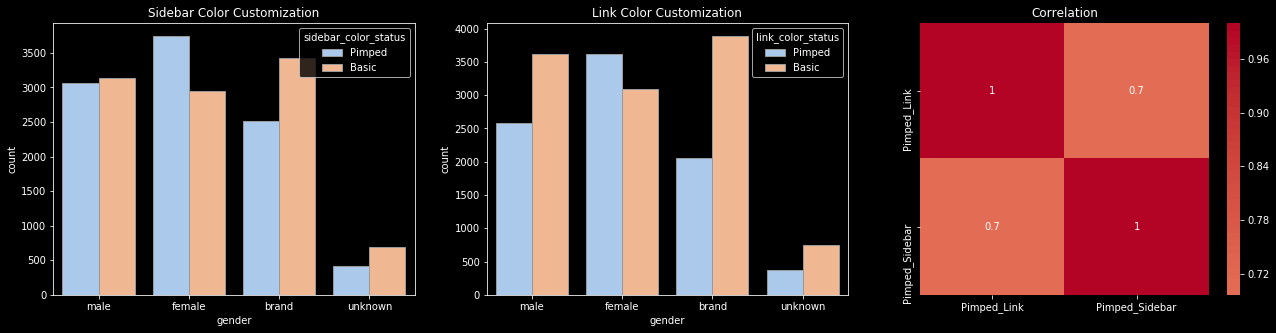

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(22,5))
fig.figsize=(20,20)
#f.suptitle('Distributions of Iris Features')
p1= sns.catplot(hue="sidebar_color_status", x="gender", kind="count",
            palette="pastel", edgecolor=".6",
            data=twitter, ax=axes[0])
axes[0].set(title='Sidebar Color Customization')
p2=sns.catplot(hue="link_color_status", x="gender", kind="count",
            palette="pastel", edgecolor=".6",
            data=twitter, ax=axes[1])
axes[1].set(title="Link Color Customization")
p3 = sns.heatmap(dfcorr.corr(), annot=True, cmap='coolwarm', square=False, center=0,
                 ax=axes[2])
axes[2].set(title="Correlation")
plt.close(p1.fig)
plt.close(p2.fig)
#plt.close(p3.fig)


# Text Analysis

## On the User Name

### Data preprocessing
Create the columns:
- name_word_count:
- name_char_count
- name_spec_char_count
- name_num_count

In [0]:
# Split name on spaces, dashes and underscores and capitalize words
import re
twitter['name_word_count'] = twitter.name.apply(lambda x: len(re.split(r'\s|-|_|[a-zA-Z][~A-Z]', x)))

In [0]:
# Number of characters
twitter['name_char_count'] = twitter.name.str.len() ## this also includes spaces

In [0]:
# Number of Special Characters
twitter['name_spec_char_count'] = twitter.name.apply(lambda x: len(re.findall(r'\W{1}',x)))

In [0]:
# Number of numerical characters
twitter['name_num_count'] = twitter.name.apply(lambda x: len(re.findall(r'\d{1}',x)))

In [0]:
#sns.pairplot(twitter[['name_word_count', 'name_char_count', 'name_spec_char_count', 'name_num_count', 'gender']], hue='gender', size=2.5);

### Viz
- unknown: 
  - more digits
  - less characters
  - less words
- brand: 
  - 2 words in average
- male: 
  - use more digits
  - 2 words in average
- female: 
  - use more digits
  - 2 words in average

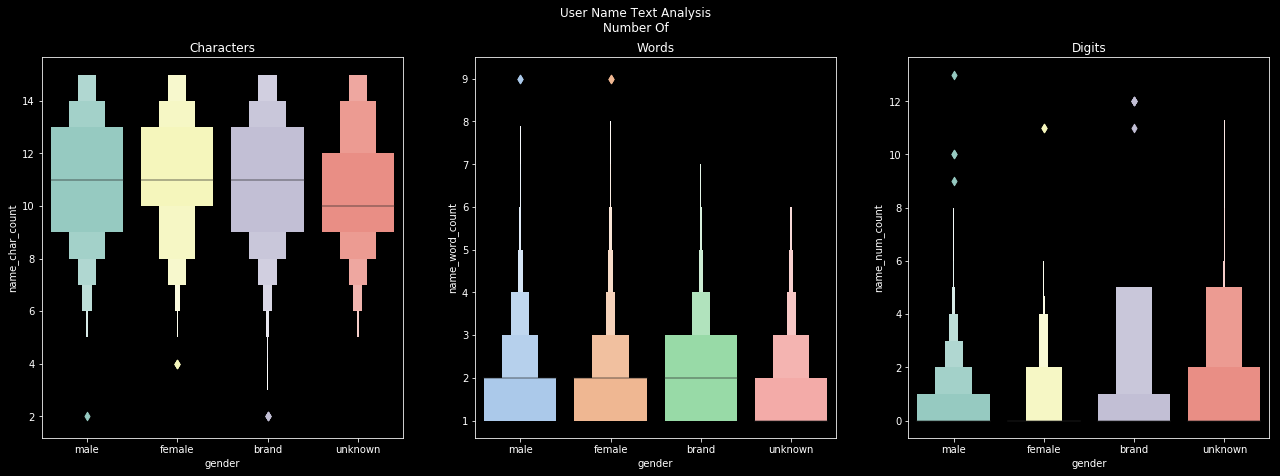

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(22,7))

fig.suptitle('User Name Text Analysis\nNumber Of')
p1 = sns.catplot(x="gender", y="name_char_count", kind="boxen", data=twitter, 
                 ax=axes[0])
axes[0].set(title='Characters')
p2 = sns.catplot(x="gender", y="name_word_count", kind="boxen",
            palette="pastel", data=twitter, ax=axes[1])
axes[1].set(title="Words")
p3 = sns.catplot(x="gender", y="name_num_count", kind='boxen',
                 data=twitter, ax=axes[2])
axes[2].set(title="Digits")

plt.close(p1.fig)
plt.close(p2.fig)
plt.close(p3.fig)



## On Tweet Text

### Data Preprocessing

#### Links

In [0]:
# Create a column that holds the number of links in each tweet
twitter['links_count'] = twitter.text.apply(lambda x: len(re.findall(r'(https?:\S+)', x)))

In [0]:
# Create a column without links
twitter['text_no_link'] = twitter.text.apply(lambda x: re.sub(r'https?:\S+', '', x))

#### Word count


In [0]:
# Create column counting words without including links
twitter['text_word_count'] = twitter.text_no_link.apply(lambda x: len(re.split(r'\s', x)))

#### Tokenize Words & Sentences and remove stop words

In [42]:
pip install -U nltk

     |████████████████████████████████| 3.1MB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/97/8a/10/d646015f33c525688e91986c4544c68019b19a473cb33d3b55
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [43]:
# tokenize words and sentences
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
twitter['text_words'] = twitter.text_no_link.apply(lambda x: np.array(word_tokenize(x)))
twitter['text_sentences'] = twitter.text_no_link.apply(lambda x: sent_tokenize(x))

In [0]:
# Create a column counting the number of sentences in each tweet
twitter['text_sentences_count'] = twitter.text_sentences.apply(lambda x:len(x))

In [46]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
stop = set(stopwords.words('english'))
print(f'{len(stop)} stop words\n', stop)

179 stop words
 {'after', 'when', 'if', 'haven', 'his', 'am', 'had', 'until', 'can', 'such', 'couldn', 'of', 'over', 'under', 'down', 'an', 'hers', 'this', 'do', 'won', 'wouldn', 'll', 'm', 'these', 'have', 'does', 'there', "she's", "should've", 'a', 'while', 'here', 'd', 'isn', 'those', 'with', 'few', 'themselves', 'into', 'against', 'my', 'as', 'and', 'for', "aren't", 'wasn', 'myself', 'out', "doesn't", 'before', "didn't", 'by', "couldn't", 'ain', 'above', 'all', 'itself', 'hasn', 'he', 'than', 'having', "haven't", 'y', "shan't", 'not', 'should', 's', 'below', 'aren', 'only', "weren't", 'her', 're', 'yourselves', 'what', 'their', 'doesn', "you'll", 'mustn', 'so', 'shan', 'our', 'very', 'been', "you're", 'between', "wouldn't", 'don', 'any', 't', 'once', "wasn't", "mightn't", "that'll", 'it', 'is', 'himself', "shouldn't", 'your', 'herself', 'who', 'doing', 'were', 'each', 'both', 'yourself', 'are', 'up', 'no', "won't", "isn't", 'the', 'where', 've', 'again', 'through', 'needn', 'you', 

In [0]:
#Create a column counting stopwords in tweet
twitter['text_stopwords_count'] = twitter.text_no_link.apply(lambda x: sum((1 if x in stop else 0 for x in x.split())))

In [0]:
# remove stop words + to lowercase
twitter['text_words_clean'] = twitter.text_words.apply(lambda x: np.array([i.lower() for i in x if i.lower() not in stop and i.isalnum() ]))
twitter['text_nb_words_clean'] = twitter.text_words_clean.apply(lambda x: x.size)

#### Profanity Check 

In [50]:
pip install profanity-check

     |████████████████████████████████| 2.4MB 5.0MB/s 
     |████████████████████████████████| 5.4MB 32.6MB/s 
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [51]:
from profanity_check import predict, predict_prob

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  super(BaseEstimator, self).__setstate__(state)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  super(BaseEstimator, self).__setstate__(state)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  super(BaseEstimator, self).__setstate__(state)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using

In [0]:
twitter['profanity_count'] = twitter.text_words_clean.apply(lambda x: sum(predict(x)) if len(x) > 0 else 0)

#### Steming: reduce each word to its root

In [0]:
from nltk.stem import PorterStemmer

In [0]:
ps = PorterStemmer()

# Create a new column 
twitter['text_words_stem'] = twitter.text_words_clean.apply(lambda x: [ps.stem(w) for w in x])

In [0]:
#sns.pairplot(twitter[['gender', 'links_count','text_word_count', 'text_sentences_count', 'text_stopwords_count', 'text_nb_words_clean', 'profanity_count']], hue='gender', size=2.5);

In [0]:
#sns.heatmap(twitter[['gender', 'links_count','text_sentences_count', 'profanity_count']].corr(), annot=True, square=False, center=0)

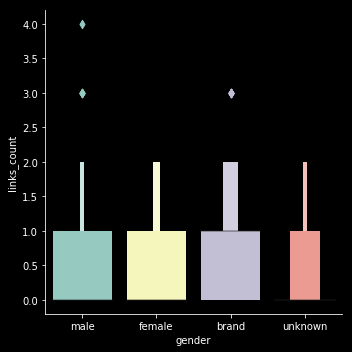

In [57]:
# links
sns.catplot(x="gender", y="links_count", kind="boxen", data=twitter)

### Viz

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


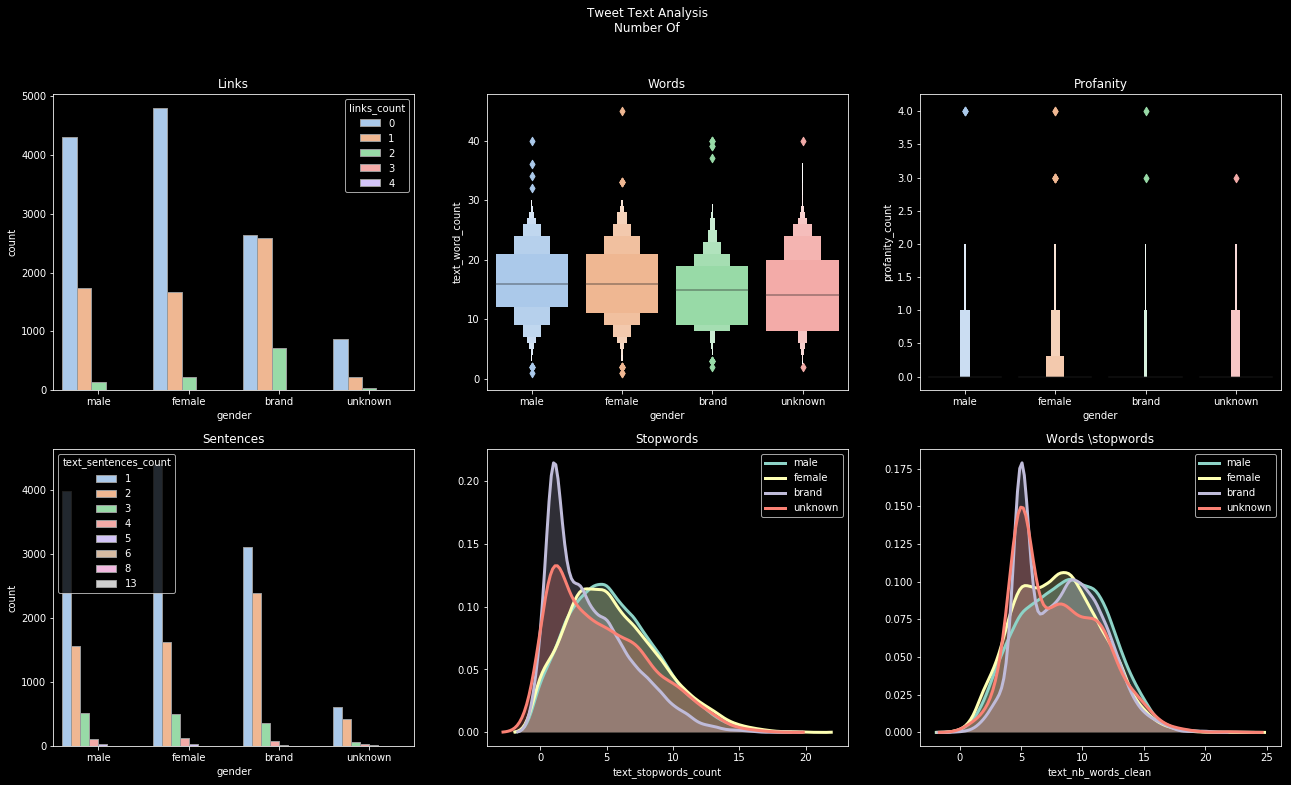

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(22,12))

fig.suptitle('Tweet Text Analysis\nNumber Of')
p1 = sns.catplot(x="gender", hue="links_count", kind="count", palette="pastel",
            edgecolor=".6",data=twitter, ax=axes[0,0])
axes[0,0].set(title='Links')
p2 = sns.catplot(x="gender", y="text_word_count", kind="boxen", palette="pastel",
            data=twitter, ax=axes[0,1])
axes[0,1].set(title="Words")
p3 = sns.catplot(x="gender", hue="text_sentences_count", kind="count", palette="pastel",
            edgecolor=".6",data=twitter, ax=axes[1,0])
axes[1,0].set(title="Sentences")
for g in twitter.gender.unique():
  p4 = sns.distplot(twitter[twitter.gender == g].text_stopwords_count, 
                    hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, 
                    label = g, ax=axes[1,1])
axes[1,1].set(title="Stopwords")
for g in twitter.gender.unique():
  p5 = sns.distplot(twitter[twitter.gender == g].text_nb_words_clean, 
                    hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, 
                    label = g, ax=axes[1,2])
#p4 = sns.catplot(x="gender", hue="text_stopwords_count", legend=False, kind="count", palette="pastel",
#            edgecolor=".6",data=twitter, ax=axes[1,0])

#p5 = sns.catplot(x="gender", hue="text_nb_words_clean", kind="count", palette="pastel",
#            edgecolor=".6",data=twitter, ax=axes[1,1], legend=False)
axes[1,2].set(title="Words \stopwords")
p6 = sns.catplot(x="gender", y="profanity_count", kind="boxen", palette="pastel",
            data=twitter, ax=axes[0,2])
axes[0,2].set(title="Profanity")


plt.close(p1.fig)
plt.close(p2.fig)
plt.close(p3.fig)
plt.close(p6.fig)


**`unknown` matches `brand` on words/sentences count but not on links count**

## Word Frequency

In [0]:
twitter['word_freq'] = twitter.text_words_stem.apply(lambda x: sorted({v: x.count(v) for v in set(x)}.items(), reverse=True))

In [0]:
b = pd.Series(np.hstack(twitter[twitter.gender == 'brand'].text_words_clean.values)).value_counts().to_frame('brand')
f = pd.Series(np.hstack(twitter[twitter.gender == 'female'].text_words_clean.values)).value_counts().to_frame('female')
m = pd.Series(np.hstack(twitter[twitter.gender == 'male'].text_words_clean.values)).value_counts().to_frame('male')
u = pd.Series(np.hstack(twitter[twitter.gender == 'unknown'].text_words_clean.values)).value_counts().to_frame('unknown')

In [61]:
d1=pd.merge(b, f, left_index=True, right_index=True)
d2=pd.merge(m, u, left_index=True, right_index=True)
df = pd.merge(d1, d2, left_index=True, right_index=True)
df.head(10)

,brand,female,male,unknown
weather,2279,15,12,402
get,1325,353,344,240
channel,1169,8,5,203
updates,1147,4,4,201
new,244,205,217,26
amp,191,203,152,16
us,165,73,81,17
one,154,327,265,37
like,150,446,350,51
love,142,320,213,34


In [62]:
df=df.apply(lambda x: x *100 / sum(x))
df.head(10)

,brand,female,male,unknown
weather,8.302670,0.045430,0.040090,6.272429
get,4.827134,1.069114,1.149233,3.744734
channel,4.258807,0.024229,0.016704,3.167421
updates,4.178659,0.012115,0.013363,3.136215
new,0.888921,0.620873,0.724952,0.405680
amp,0.695836,0.614816,0.507801,0.249649
us,0.601115,0.221092,0.270604,0.265252
one,0.561040,0.990369,0.885311,0.577313
like,0.546468,1.350778,1.169278,0.795756
love,0.517323,0.969168,0.711589,0.530504


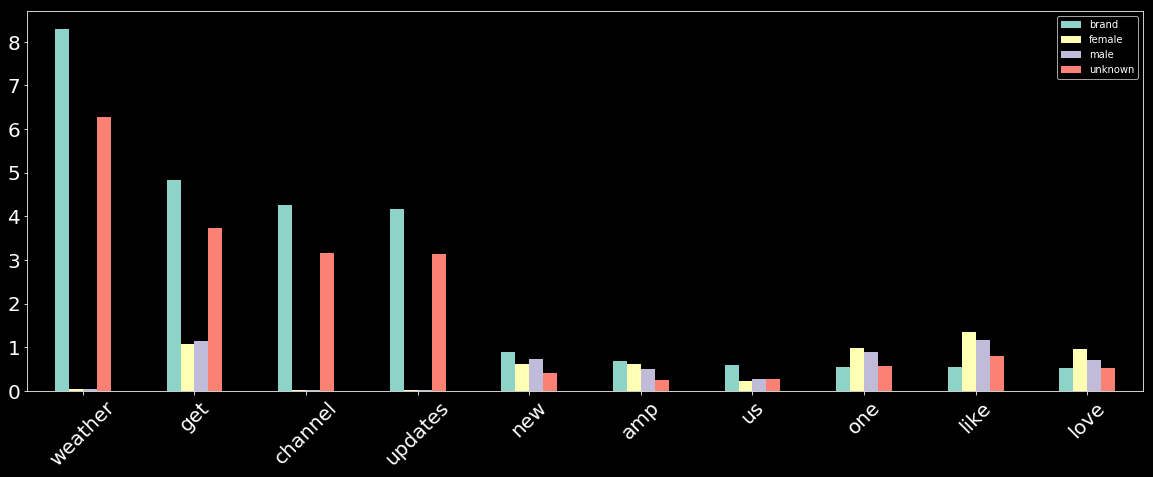

In [63]:
df.head(10).plot(kind='bar', figsize=(20,7), fontsize=20, rot=45)

In [64]:
df['male']
df.columns[1]

'female'

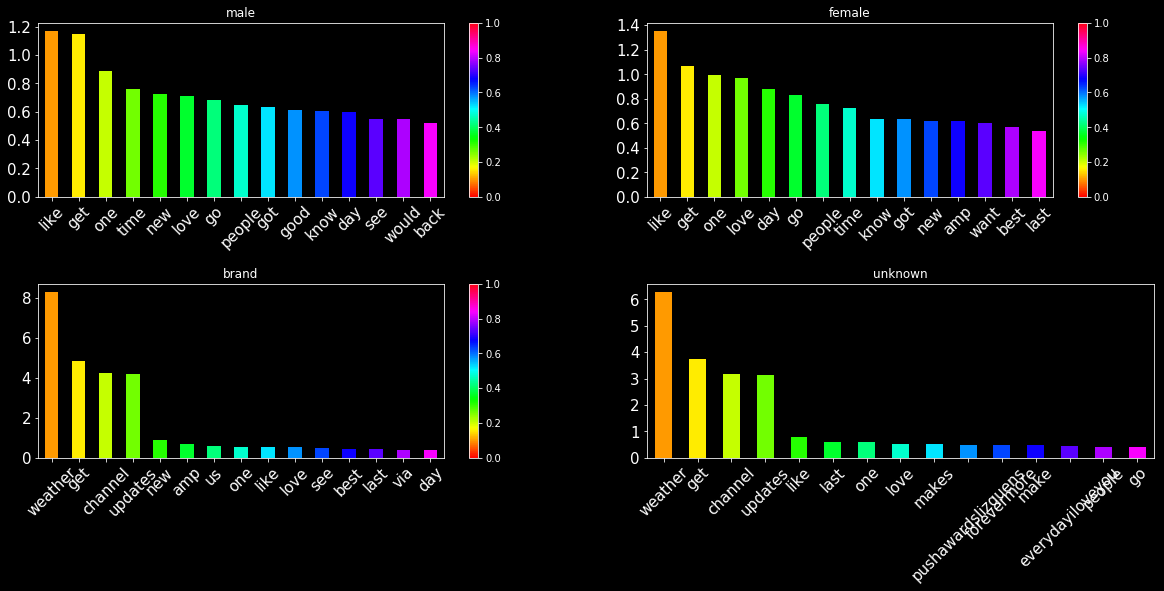

In [65]:
sm = plt.cm.ScalarMappable(cmap=plt.cm.hsv, norm=plt.Normalize(vmin=0, vmax=1))
# fake up the array of the scalar mappable. Urgh…
sm._A = []
y = np.arange(10, 100, step=5)
colors = plt.cm.hsv(y / float(max(y)))
for i,g in enumerate(twitter.gender.unique()[:-1]):
    plt.colorbar(sm)
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust()
    plt.title(g)
    df[g].nlargest(15).plot(kind='bar', figsize=(20,8), fontsize=15, rot=45, color=colors)
plt.subplots_adjust(hspace=0.5)

### Self-Centerness Vs Altruism

In [0]:
# percentage of words by tweet
twitter['ratio_I_me'] = twitter.text_words.apply(lambda x: (x.tolist().count('i') + x.tolist().count('me'))*100/x.size)
twitter['ratio_we_us'] = twitter.text_words.apply(lambda x: (x.tolist().count('we') + x.tolist().count('us'))*100 / x.size)
twitter['ratio_you'] = twitter.text_words.apply(lambda x: (x.tolist().count('you') + x.tolist().count('u'))*100 / x.size)

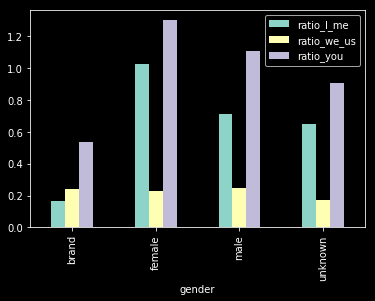

In [67]:
twitter.groupby('gender')[['ratio_I_me', 'ratio_we_us', 'ratio_you']].mean().plot(kind='bar')

# What Now ?

- Push the Analysis, get more data:
  - **Sentiment Anaylysis** : number of positive/negative/neutral words based on a rating from 0 to 5
  - **POS Tagging**: Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. 
  - Actual hour of the tweet creation
- Use Machine to predict the gender for the `unknown` 